In [130]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import platform

df = pd.read_csv('daegu-utf8.csv')
df.columns = ['날짜','지점','평균기온','최저기온','최고기온']
df['날짜'] = pd.to_datetime(df['날짜'],format='%Y-%m-%d')
df = df.dropna(axis=0)
df


,날짜,지점,평균기온,최저기온,최고기온
701,1909-01-01,143,-4.1,-8.0,0.1
702,1909-01-02,143,-0.8,-6.7,6.1
703,1909-01-03,143,1.0,-2.4,3.6
704,1909-01-04,143,4.2,0.0,9.2
705,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
42365,2023-01-27,143,-3.0,-6.5,0.3
42366,2023-01-28,143,-3.6,-8.3,1.1
42367,2023-01-29,143,0.8,-6.0,6.4
42368,2023-01-30,143,1.3,-3.2,5.8


12월 최저기온 평균:
[-3.9, -0.5, -2.8, 0.5, -0.6, -4.0, -2.3, -1.0, -3.1, -2.1, -4.0]
12월 최고기온 평균:
[3.9, 8.1, 5.8, 9.0, 8.7, 5.8, 7.0, 9.0, 7.2, 8.9, 5.4]


C:\Users\jangmark\AppData\Local\Temp\ipykernel_4232\2362627202.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  s_df = s_df[df['날짜'].dt.month == month]


AttributeError: 'Int64Index' object has no attribute 'dt'

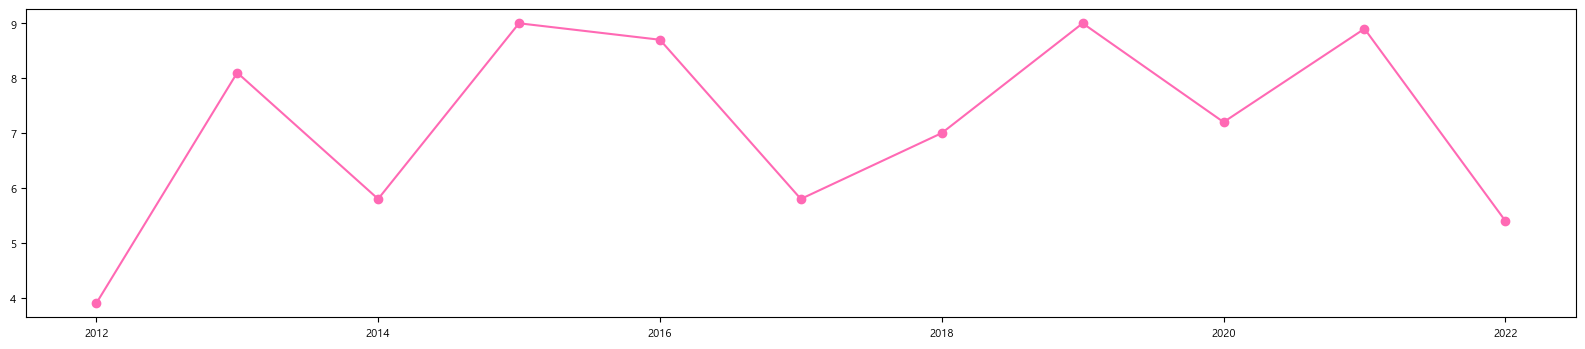

In [131]:
startyear = int(input("시작년도"))
endyear = int(input("끝나는 년도"))
month = int(input('측정할 달'))

s_df = df[(df['날짜'].dt.year>=startyear) & (df['날짜'].dt.year <= endyear)]
s_df = s_df[df['날짜'].dt.month == month]
mean_df = s_df.groupby(s_df['날짜'].dt.year).mean()
mean_df = round(mean_df,1)


print(f'{month}월 최저기온 평균:')
print(list(mean_df['최저기온']), sep = ', ')
print(f'{month}월 최고기온 평균:')
print(list(mean_df['최고기온']), sep = ', ')

plt.figure(figsize=(20, 4))
plt.plot(mean_df.index, mean_df['최고기온'], 'hotpink', marker='o', label='최고기온')
plt.plot(mean_df.index.dt.year, mean_df['최저기온'], marker='s', label='최저기온')

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic', size = 8)
else:
    plt.rc('font', family='AppleGothic', size=8)
    
plt.rcParams['axes.unicode_minus'] = False
plt.title(f'{startyear}년부터 {endyear}년까지 {month}월의 기온 변화',size=16)
plt.legend()
plt.show()
